# FPL Project

## Introduction to the English Premier League

The English Premier League (EPL), better known as the Premier League, is the top-flight professional football league in England. In addition to being the most competitive football league in the world according to the UEFA Coefficient Ranking, the Premier League is the most-watched sports league in the world, with millions of fans tuning in to watch the weekly matches from all over the globe.

The league consists of twenty teams from all over England, and the season generally runs from August to May. Every team plays every other team twice, once at home and once away, resulting in a total of 38 games. Winning a game gets the team three points, a draw gets one and a loss gets zero. At the end of the season, the team with the highest number of points are crowned the champions. The three teams with the lowest number of points get relegated to the second-tier of English football, also known as the Championship for the following season. Similarly, three of the best teams in the Championship get promoted into the Premier League. Since gaining points is critical for both the top and the bottom of the league, the vast majority of games are fiercely competitive.

The Premier League is the home of many important and famous football clubs, including Chelsea, Manchester United, Manchester City, Arsenal and Liverpool, each of whom were champions at least once in the past twenty years. The Premier League has also helped develop many of the world's best players, including Cristiano Ronaldo, Luis Suarez, Thierry Henry and Wayne Rooney.

Overall, the Premier League is a powerhouse in world football, offering fans high-quality football, competitive matches, and features some of the biggest and best clubs in the world. Its global popularity is a testament to the league's influence, and it will undoubtedly attract the world's best players for years to come.

## Introduction to Fantasy Premier League

Fantasy Premier League (FPL) is an online strategy game that casts the player in the role of a Fantasy manager. Each manager assembles a virtual team of real-life football players in the English Premier League and score points based on their real-life performance in their Premier League matches. The goal for each manager in FPL is to maximise their points by the end of the season.

At the beginning of the season, managers are allocated a budget of £100 million to build their team of 15 players. Prices of players are assigned at the beginning of the season, then they fluctuate throughout the season based on their performance.

Points are awarded to players for goals, assists, saves, clean sheets as well as bonus points, which are awarded to the top-performing individuals in a match. Points can also be taken away for yellow cards, red cards and goals conceded. A team's points for the match round or "gameweek" will be scored by the starting XI. There are 38 gameweeks every season; one for each match.


## Project Goal

FPL is a popular game amongst fans of the English Premier League, as Fantasy managers attempt to build an optimal team of players every gameweek. Fantasy managers can only guess the optimal combination of players, because they must pick their teams before any real-life Premier League games occur. In other words, there is *uncertainty* regarding which players will perform the best. For this project, we will be removing this uncertainty by using the FPL dataset of the 2016-2017 season, which has already recorded the number of points each player attains for every gameweek.

The goal of this project is to find the optimal combination of players over the 38 week 2016-2017 season that maximises the total number of FPL points. This project can be considered an optimisation problem, because we are attempting to maximise the total number of points of our team in the 2016-2017 season, whilst adhering to a multitude of different constraints.

## Constraints & Extra Rules

The main constraints that we will be analysing are:

1. Position Constraint: Each manager must select a team of 15 players, consisting of 2 goalkeepers, 5 defenders, 5 midfielders, and 3 forwards.

2. Price Constraint: The total price of the 15 players cannot exceed £100 million at the beginning of the season.

3. Formation Constraint: The starting XI of each team must play with a formation of 1 goalkeeper, 3-5 defeneders, 2-5 midfielders, and 1-3 forwards. The remaining four players would be on the bench, but the chosen formation can change before each gameweek.

4. Team Constraint: Each manager can have a maximum of three players from the same Premier League team at any point in the season.

5. Transfer Constraint: Each manager is allowed one free transfer per week. Any subsequent transfers results in a four-point deduction for that gameweek. A manager can transfer or "exchange" any of their players for a different player, given that the price constraint still holds.

These constraints will make the calculation of the optimal team more difficult, as we cannot just pick the highest-scroing players from each gameweek. We can classify these constraints into "team-building constraints" and a "team-evaluating constraint". The first four of these constraints interfere with the building of the team, in the sense that the team would be invalid of they are not satisfied. The last constraint, the transfer constraint is considered a "team-evaluating constraint" because it does not interfere with the building of the team. Having more transfers does not invalidate a team, but rather "punishes" teams for transfering more players by decreasing the total number of points

There are some extra rules in FPL that can help managers increase their points total. Captaincy should be assigned every week and the Wildcard can be used twice a week. The three chips can only be used in a single gameweek of choice. Here are some more in depth descriptions of the rules:

1. Captaincy: One player every week can be named captain. Their points are doubled for that gameweek.

2. Bench Boost Chip: The points scored by the bench players in the next gameweek are included in the points total.

3. Free Hit Chip: Make unlimited free transfers for a single gameweek. At the next deadline, the squad is returned to how it was at the start of the gameweek.

4. Triple Captain Chip: The captain points are tripled instead of doubled for that gameweek.

5. Wildcard: All transfers in the gameweek are free of charge. Each manager gets two wildcards; one in the first half of the season and one in the second half of the season.

## Introduction to the Dataset

In order to find the optimal FPL team, we need to use a dataset that includes the gameweek-to-gameweek performances of all players. We decided to use [this](https://github.com/vaastav/Fantasy-Premier-League) dataset compiled by Vaastav Anand that includes comprehensive statistics for an array of different features for every player per gameweek, including 'minutes played', 'passes completed', 'shots off target' and even 'errors leading to a goal attempt'. Key to this project, we will only be needing to use the 'name', 'total points', 'price', 'position', 'team' and 'player ID' features. These features will be key to ensuring that all of the constraints are satisfied. We can take a look at a snippet of the dataset below:

In [2]:
import pandas as pd

def data(gw):

    gw = pd.read_csv('gws/gw' + str(gw) + '.csv', encoding='latin1').sort_values(by = 'element').reset_index(drop=True).reindex() # Load gameweek data
    pos_data = pd.read_csv('players_raw.csv', encoding='latin1').rename(columns={'id': 'element'}) # Load position data
    gw = pd.merge(gw, pos_data[['element', 'element_type','team']], on=['element'], how='left') # Extract Important Columns from Position data and Merge dataframes
    gw = gw[['name','total_points','value','element_type','team','element']].rename(columns={'value':'price', 'element_type':'position', 'element':'unique_id'}) # Extract the important columns
    gw['price'] = gw['price'] / 10.0 # Divide the price by ten to fit into the £100 million constraint
    return gw

data(2)

,name,total_points,price,position,team,unique_id
0,David_Ospina,0,5.0,1,1,1
1,Petr_Cech,6,5.5,1,1,2
2,Laurent_Koscielny,7,6.0,2,1,3
3,Per_Mertesacker,0,5.0,2,1,4
4,Gabriel Armando_de Abreu,0,5.0,2,1,5
...,...,...,...,...,...,...
532,Steven_Pienaar,1,5.0,3,15,533
533,Reece_Burke,0,4.0,2,20,534
534,Ashley_Fletcher,1,5.0,4,20,535
535,Ryan_Fraser,2,5.0,3,2,536


This is the dataset for the second gameweek of the 2016-2017 FPL season. In the first column, we have a list of all the players that are in the game. The second column includes the total number of points that the player has scored in this gameweek. For example, the player Petr Cech scored a total of 6 points in this gameweek. The third column is the price of buying the player in this gameweek. This is a very important column, because prices of players fluctuate during the season depending on their performance. For example, a player may start off by costing £5.0 million, but due to great performances may end the season costing £6.2 million. It is critical that we keep track of how the prices of players change, because this can affect how we choose our optimal team according to our price constraint. The position column is encoded so that '1's are goalkeepers, '2's are defenders, '3's are midfielders, and '4's are forwards. The team column is also encoded for each of the 20 teams in the Premier League. For this project, the team names are not important, we just need to ensure that we do not have more than three players from any one team. The unique ID column is also critical to our analysis, as it assigns a number to each player, and we can use this to compare a player's performance across multiple gameweeks. Let us take a closer look at the total_points, price, position and team variables to get a more comprehensive idea of how these variables work.

#### Analysing Total Points

The total points column is one of the most important columns in this dataset, because it is the variable that we are trying to maximise. Before we analyse this column, let's take a look at the table below, which shows how players can attain points in FPL:

Action | Points
--- | ---
Playing up to 60 minutes | 1
Playing more than 60 minute | 2
Scoring a goal by a goalkeeper or defender| 6
Scoring a goal by a midfielder | 5
Scoring a goal by a forward | 4
Assisting a goal | 3
Keeping a clean sheet by a goalkeeper or defender | 4
Keeping a clean sheet by a midfielder | 1
Saving three shots by a goalkeeper | 1
Saving a penalty | 5
Missing a penalty | -2
Conceding two goals by a goalkeeper or defender | -1
Getting a yellow card | -1
Getting a red card | -3
Scoring an own goal | -2
Bonus point for the best players | 1-3

From the table above, we can deduce that a defender who played 72 minutes and scored a goal, but conceded two goals and got a yellow card would be given 2 + 6 - 1 - 1 = 6 points. It is also possible to get a negative total number of points. For example, a midfielder who played 54 minutes and scored an own goal would be given 1 - 2 = -1 points. 

Let's now take a look at the distribution of points amongst the players in the second gameweel, and describe a few of the summary statistics:

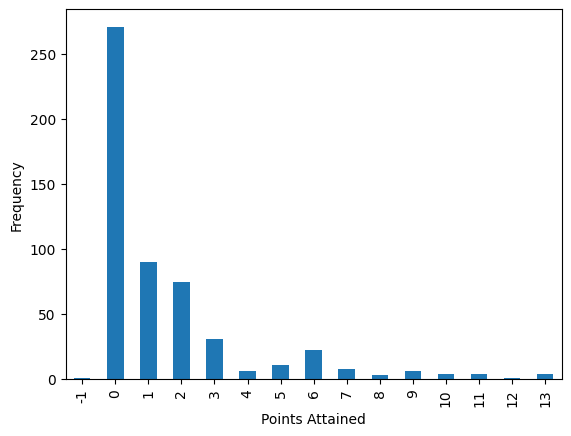

Mean number of points: 1.54
Standard Deviation: 2.5
Median number of points: 0.0
Proportion of players who attained zero points or less: 0.51
Proportion of players who attained one or two points: 0.31
Proportion of players who attained three points or more: 0.19
Proportion of players who attained six points or more: 0.1
Proportion of players who attained eight points or more: 0.04


In [3]:
import matplotlib.pyplot as plt

df = pd.DataFrame(data(2)['total_points'])
fig, ax = plt.subplots()
df['total_points'].value_counts().sort_index().plot(ax = ax, kind='bar', xlabel = 'Points Attained', ylabel='Frequency')
plt.show()

print("Mean number of points:", round(df.mean().item(),2))
print("Standard Deviation:", round(df.std().item(),2))
print("Median number of points:", round(df.median().item(),2))
print("Proportion of players who attained zero points or less:", round(len(df[df['total_points'] <= 0]) / len(df['total_points']), 2))
print("Proportion of players who attained one or two points:", round(len(df[df['total_points'] == 1] + df[df['total_points'] == 2]) / len(df['total_points']), 2))
print("Proportion of players who attained three points or more:", round(len(df[df['total_points'] >= 3]) / len(df['total_points']), 2))
print("Proportion of players who attained six points or more:", round(len(df[df['total_points'] >= 6]) / len(df['total_points']), 2))
print("Proportion of players who attained eight points or more:", round(len(df[df['total_points'] >= 8]) / len(df['total_points']), 2))

From the above plot, we can see that there are a lot of players that have zero points for the second gameweek, with over 250 players attaining this point total, or approximately 51% of the players. The majority of these players were unused substitutes, and hence were unable to get attain any points. We can also see that the distribution of the points is right-skewed, as only approximately 19% of the players attained three points or more, and only approximately 10% of the players attained six points or more. The easiest method to attain points in FPL is from the two points give for playing at least 60 minutes, which is why we see a big drop-off in the distribution of points after the second point attained. The demographic of players we are generally interested in for this project lies within the eight points or more range, as these greater number of points will help us maximise the points over a whole season. Only about 4% of the players have this attribute, so we will be zeroing in on this subset of players when trying to find an optimal combination of players.

#### Analysing Price

The price column is a very important column to analyse for this project, because price is one of the constraints. Since we have £100 million to spend, we will likely be spending around £100 million / 15 players = £6.6 million per player. Let's see how the prices of players are distributed in the second gameweek using the histogram below:

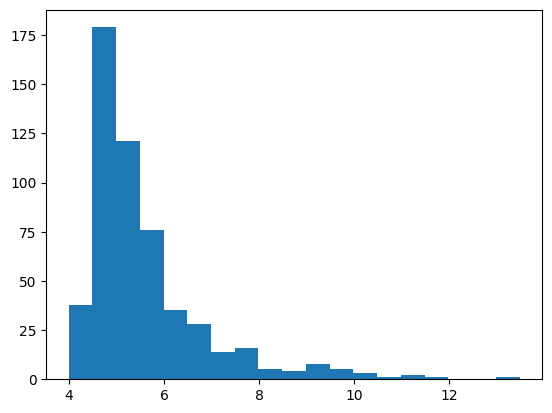

Mean Price: 5.37 million
Standard Deviation: 1.31 million
Median Price: 5.0 million
Proportion of players that cost less than £6 million: 0.77
Proportion of players that cost between £6 million and £8 million: 0.18
Proportion of players that cost more than £8 million: 0.05


In [4]:
df = pd.DataFrame(data(2)['price'])

plt.hist(df, bins=19, range=(3.99,13.49))
plt.show()

print("Mean Price:", round(df.mean().item(),2), "million")
print("Standard Deviation:", round(df.std().item(),2), "million")
print("Median Price:", round(df.median().item(),2), "million")
print("Proportion of players that cost less than £6 million:", round(len(df[df['price'] < 6]) / len(df['price']), 2))
print("Proportion of players that cost between £6 million and £8 million:", round(1 - (len(df[df['price'] < 6]) + len(df[df['price'] > 8])) / len(df['price']), 2))
print("Proportion of players that cost more than £8 million:", round(len(df[df['price'] > 8]) / len(df['price']), 2))

From the histogram plot above, we can see that the vast majority of players cost less than our average spending per player of £6.6 million. 18% of players have a price near this range, in between £6 million and £8 million. Like our total points plot earlier, the price data seems to be right-skewed, as only around 5% of the players are worth more than £8 million.

The reason as to why some players are more expensive than others is because they are expected to output more points than players who cost less, but this is not always the case due to uncertainty. Most players are very cheap because they are often substitutes, so for most of the season, they will score zero or one points every gameweek. But do more expensive players output more than less expensive player? Let's take a look at the point distribution of the players who cost more than £8 million.

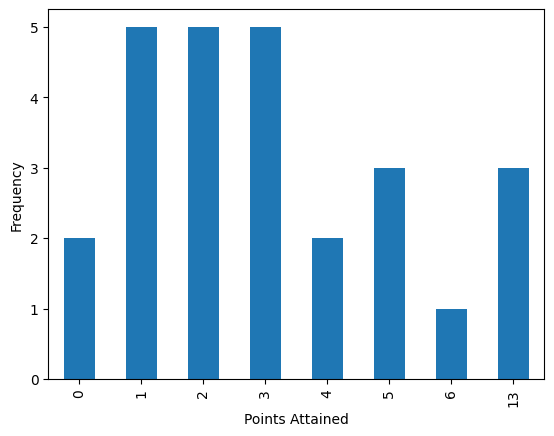

In [5]:
df = pd.DataFrame(data(2)[data(2)['price']>8]['total_points'])
fig, ax = plt.subplots()
df['total_points'].value_counts().sort_index().plot(ax = ax, kind='bar', xlabel = 'Points Attained', ylabel='Frequency')
plt.show()

We can see that their point distribution includes 10 players who only scored one or two points, and there are even a couple of players who scored zero! On the other hand, there are three expensive players who scored the maximum 13 points, which indicates that investing in certain expensive players pays off. No expensive players scored anywhere between 7 and 12 points this gameweek, so there are some cheaper players who outperformed a lot of the expensive players. Investing the money in those players may be worthwhile, as they maximise points and minimise the cost.

Prices of players also fluctuate throughout the season due to performance. Players who perform well increase their price, whilst players who perform poorly, or do not play enough end up with a decrease in their overall price. Let's take a look at the price distribution of the 38th gameweek, and see how it compares to the second gameweek.

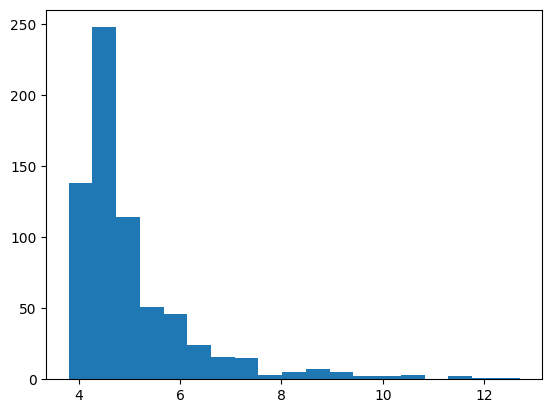

Mean Price: 5.04 million
Standard Deviation: 1.24 million
Median Price: 4.6 million
Proportion of players that cost less than £6 million: 0.86
Proportion of players that cost between £6 million and £8 million: 0.1
Proportion of players that cost more than £8 million: 0.04


In [6]:
df = pd.DataFrame(data(38)['price'])

plt.hist(df, bins=19)
plt.show()

print("Mean Price:", round(df.mean().item(),2), "million")
print("Standard Deviation:", round(df.std().item(),2), "million")
print("Median Price:", round(df.median().item(),2), "million")
print("Proportion of players that cost less than £6 million:", round(len(df[df['price'] < 6]) / len(df['price']), 2))
print("Proportion of players that cost between £6 million and £8 million:", round(1 - (len(df[df['price'] < 6]) + len(df[df['price'] > 8])) / len(df['price']), 2))
print("Proportion of players that cost more than £8 million:", round(len(df[df['price'] > 8]) / len(df['price']), 2))

Even though there are a lot of changes of prices throughout the season, the price distribution has not changed too much. The main change that occurred between the two gameweeks is that the mean price of players decreased from £5.37 million to £5.04 million, and the median price decreased from £5.0 million to £4.6 million. Again, this can be due to the fact that most of the players in the Premier League do not get to play many minutes on a weekly basis, which leads to a low point count. Attaining a low point count would lead to a price decrease, as they had a weaker performance. It is also interesting, however, that the standard deviation only decreased from £1.31 million to £1.24 million. This means that even though there were a lot of overall price decreases between players, there are also a number of players who performed well over the season and had an increase in their prices. This is further backed up by the proportion of players that cost more than £8 million, which has only decreased by 1% between the 2nd and 38th gameweek.

#### Analysing Position

Like the price column, the position column is important, because we need to ensure that we satisfy the constraints, namely the position and formation constraint. When forming a team, we need to make sure that we have 2 goalkeepers, 5 defenders, 5 midfielders, and 3 forwards. Let's see how the players are distributed between these four categories with the barplot below.

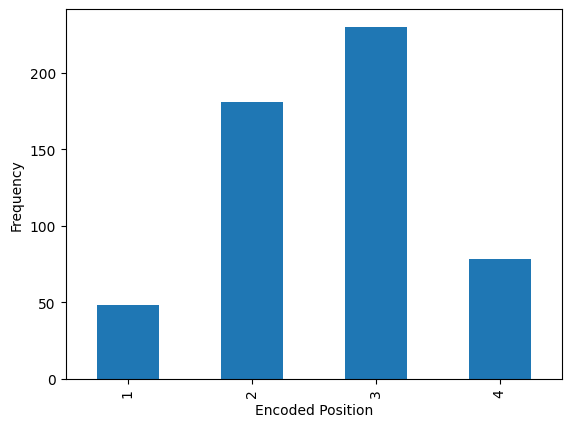

Proportion of players who are goalkeepers: 0.09
Proportion of players who are defenders: 0.34
Proportion of players who are midfielders: 0.43
Proportion of players who are forwards: 0.15


In [7]:
df = pd.DataFrame(data(2)['position'])
fig, ax = plt.subplots()
df['position'].value_counts().sort_index().plot(ax = ax, kind='bar', xlabel = 'Encoded Position', ylabel='Frequency')
plt.show()

print("Proportion of players who are goalkeepers:", round(len(df[df['position'] == 1]) / len(df['position']), 2))
print("Proportion of players who are defenders:", round(len(df[df['position'] == 2]) / len(df['position']), 2))
print("Proportion of players who are midfielders:", round(len(df[df['position'] == 3]) / len(df['position']), 2))
print("Proportion of players who are forwards:", round(len(df[df['position'] == 4]) / len(df['position']), 2))

As a reminder, we encoded goalkeepers to '1', defenders to '2', midfielders to '3', and forwards to '4'. We can see that the two most popular positions from the plot above are defenders and midfielders, as they collectively comprise 77% of all the players in FPL. This is an interesting comparison, but let us see if there is a difference in price between these groups.

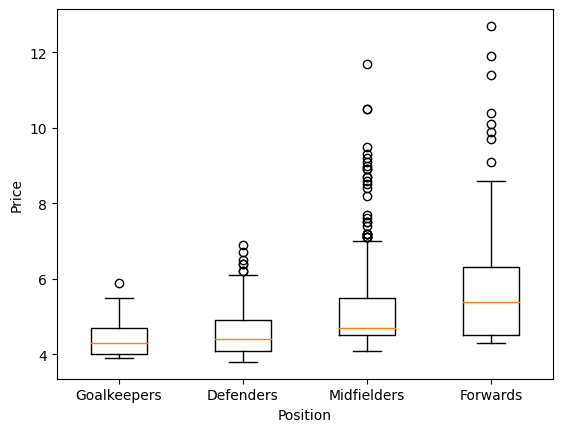

Mean Price of Goalkeepers: 4.4
Mean Price of Defenders: 4.59
Mean Price of Midfielders: 5.23
Mean Price of Forwards: 5.9


In [8]:
gk_df = data(38)[data(38)['position'] == 1]
def_df = data(38)[data(38)['position'] == 2]
mid_df = data(38)[data(38)['position'] == 3]
fwd_df = data(38)[data(38)['position'] == 4]
my_dict = {'Goalkeepers': gk_df['price'], 'Defenders': def_df['price'], 'Midfielders': mid_df['price'], 'Forwards': fwd_df['price']}
fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
ax.set_ylabel('Price')
ax.set_xlabel('Position')
plt.show()
print("Mean Price of Goalkeepers:", round(gk_df['price'].mean(),2))
print("Mean Price of Defenders:", round(def_df['price'].mean(),2))
print("Mean Price of Midfielders:", round(mid_df['price'].mean(),2))
print("Mean Price of Forwards:", round(fwd_df['price'].mean(),2))

Now we can see a substansial difference between the four groups. Goalkeepers have the lowest median price, followed by defenders, then midfielders, and finally forwards. The goalkeepers also have the lowest variation in price, followed by defenders, then midfielders, and finally forwards. Although most value of players lie between the £4 million and £6 million range, regardless of position, the difference in price points lie in the extremities. For instance, the most expensive forwards is more than double the price of the most expensive forward! But does investing in more expensive forwards yield a higher point return than investing in the less expensive defenders? Let's see by plotting the points per million distributions of players by positions, who have scored at least one point throughout each of the gameweeks.

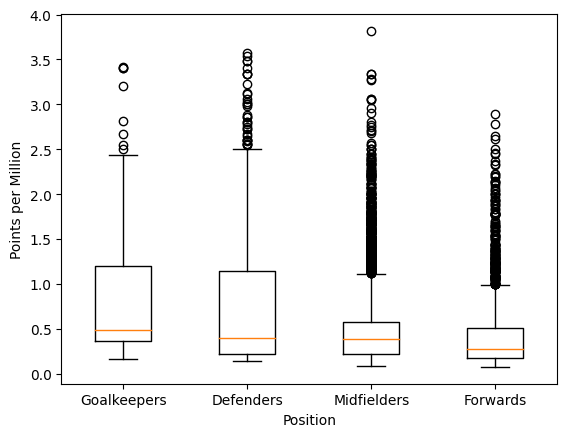

Mean Points per Million of Goalkeepers: 0.77
Mean Points per Million of Defenders: 0.69
Mean Points per Million of Midfielders: 0.51
Mean Points per Million of Forwards: 0.45


In [9]:
df = data(1)
for k in range(2,39):
    df = pd.concat([df, data(k)])
df = df[df['total_points'] > 0]
gk_df = df[df['position'] == 1]
def_df = df[df['position'] == 2]
mid_df = df[df['position'] == 3]
fwd_df = df[df['position'] == 4]
my_dict = {'Goalkeepers': gk_df['total_points'] / gk_df['price'], 'Defenders': def_df['total_points'] / def_df['price'], 'Midfielders': mid_df['total_points'] / mid_df['price'], 'Forwards': fwd_df['total_points'] / fwd_df['price']}
fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
ax.set_ylabel('Points per Million')
ax.set_xlabel('Position')
plt.show()
print("Mean Points per Million of Goalkeepers:", round((gk_df['total_points'] / gk_df['price']).mean(),2))
print("Mean Points per Million of Defenders:", round((def_df['total_points'] / def_df['price']).mean(),2))
print("Mean Points per Million of Midfielders:", round((mid_df['total_points'] / mid_df['price']).mean(),2))
print("Mean Points per Million of Forwards:", round((fwd_df['total_points'] / fwd_df['price']).mean(),2))

This plot shows a completely different narrative than the previous one. The previous plot showed that forwards, on average, were the most expensive players and should likely produce the highest return of points, this plot shows that when you take into account the number of points that they attain, the forwards, on average, produce the lowest return on investment. We can infer this from the plot above, as the mean and median values are the lowest for forwards, and the most extreme outlier for forwards is at least 0.5 points per million less than any extreme outlier of any of the other positions. This could indicate to us, that if we have an issue with the price constraint, it may be more useful to invest in a defender as opposed to a forward, as they are generally cheaper.

#### Analysing Team

The team column is an essential component of this dataset because we need it to satisfy the team constraint. As a reminder, the team constraint is that we cannot have more than three players from any one Premier League team during any gameweek. Because of this, we do not need to know which Premier League team any player is specifically on, but rather that they do not have more than two other players from the same Premier League team in our Fantasy team. Let's take a look at the number of players on each team. Since there are twenty teams in the Premier League, the values are encoded from 1 to 20.

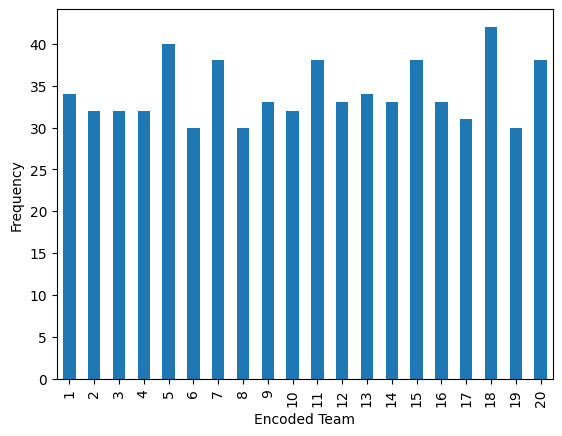

Median number of players on a team: 33.0
Mean number of players on a team: 34.15
Minimum number of players on a team: 30
Maximum number of players on a team: 42


In [10]:
df = pd.DataFrame(data(38)['team'])
fig, ax = plt.subplots()
df['team'].value_counts().sort_index().plot(ax = ax, kind='bar', xlabel = 'Encoded Team', ylabel='Frequency')
plt.show()
print("Median number of players on a team:", df['team'].value_counts().median())
print("Mean number of players on a team:", df['team'].value_counts().mean())
print("Minimum number of players on a team:", df['team'].value_counts().min())
print("Maximum number of players on a team:", df['team'].value_counts().max())

There does not seem to be any drastic differences between any of the teams in the Premier League. In fact, the number of players on each Premier League team lies between 30 and 42 players. The mean value is slightly larger than the median value, indicating that the data is slightly skewed to the right. Let's see if the team has any indication on how many points the players earn in total over a season.

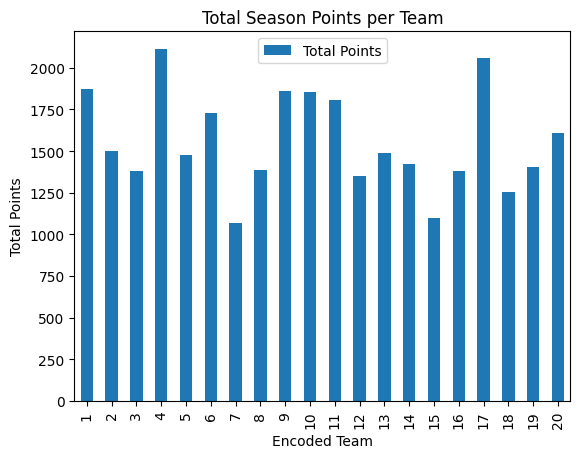

In [26]:
df = data(1)
for k in range(2,39):
    df = pd.concat([df, data(k)])
fig, ax = plt.subplots()
points = []
for k in range(1,21):
    points.append(df.loc[df['team'] == k, 'total_points'].sum())
points = pd.DataFrame(points, columns=["Total Points"])
points.index = points.index + 1
points.plot(kind='bar', title='Total Points', ax=ax)
plt.xlabel("Encoded Team")
plt.ylabel("Total Points")
plt.title("Total Season Points per Team")
plt.show()

There seems to be a large variation between all of the teams. Team '4', which is Chelsea, attained the highest number of Fantasy player points throughout the season. In fact, they attained more than double the number of points than Team '7' and Team '15', which are Hull City and Sunderland. This plot is a good indicator on how well a Premier League team does in the season, as Chelsea actually ended up winning the Premier League in the 2016-2017 season, and both Hull City and Sunderland were relegated to the Championship. In addition to Chelsea, we will likely see a lot of players from Teams '1', '9', '10' and '17' in our calculation of an optimal team later in this project, as they have the highest overall returns. For reference, these teams are Arsenal, Liverpool, Machester City, and Tottenham, who placed 5th, 4th, 3rd and 2nd respectively in the Premier League in the 2016-2017 season.

Now that we have had a comprehensive look at all of the variables in the dataset, let us take a look at the methods that we will be implementing to solve this optimisation problem.

## Methods

For this project, we will be using three classes. The team of the week ([totw](https://github.com/ashabib1/fpl/blob/main/totw.py)) class helps us find the players that score the highest number of points in a given gameweek. The team of the year ([toty](https://github.com/ashabib1/fpl/blob/main/toty.py)) class helps us find the players that cumulatively score the highest number of points in a range of gameweeks. The [evaulate](https://github.com/ashabib1/fpl/blob/main/evaluate.py) class helps us evaluate the number of points achieved in a season, given a list of players for every gameweek. Here is a list of the classes:

In [12]:
from totw import totw
from toty import toty
from evaluate import evaluate

Let us take a closer look at the team of the week function, by looking at the first team of the week:

In [13]:
team_of_the_week_one = totw(1)
print("Week One Team of the Week:")
print(team_of_the_week_one.find_names())

Week One Team of the Week:
['Ben_Foster', 'James_Collins', 'Stephen_Kingsley', 'Gareth_McAuley', 'Philippe_Coutinho', 'Anthony_Martial', 'Leroy_Fer', 'Adam_Lallana', 'Eden_Hazard', 'Álvaro_Negredo', 'Sergio_Agüero']


From the result of the previous cell, we have found the names of the eleven highest scoring players in the first gameweek of the season. These players were able to achieve high scores by either scoring goals, giving assists, keeping clean sheets, or making saves. We can get a more accurate look of how well they did by extracting the number of points they each achieved:

In [14]:
for x, y, in zip(team_of_the_week_one.find_names(), team_of_the_week_one.find_points()):
    print(x, ":", y)
print("")
print("The First Team of the Week achieved", sum(team_of_the_week_one.find_points()), "points in total.")

Ben_Foster : 10
James_Collins : 8
Stephen_Kingsley : 8
Gareth_McAuley : 7
Philippe_Coutinho : 15
Anthony_Martial : 11
Leroy_Fer : 11
Adam_Lallana : 11
Eden_Hazard : 10
Álvaro_Negredo : 9
Sergio_Agüero : 9

The First Team of the Week achieved 109 points in total.


We can see from above that Philippe Coutinho was the highest scoring player of the first gameweek, with a whopping 15 points! There were a lot of points scored in this gameweek. How many points would we achieve if we find the sum of all the points achieved in each gameweek? Let's find out.

In [15]:
total_points = 0
for k in range(1,39):
    total_points += sum(totw(k).find_points())
print("Cumulative number of points from the 38 gameweeks:", total_points)

Cumulative number of points from the 38 gameweeks: 5127


So that's it. If we play optimally, we get 5127 points!

Not so fast... This is not the optimal team, because it does not take into account many of the constraints. The position constraint is not satisfied, because we only picked the starting XI, and not the substitutes. The price constraint is not satisfied, because we did not look at prices when we picked the team of the week. The transfer constraint is not satisfied, because we did not take any points away for having an ever-changing team. The team constraint is not satisfied, because we are allowed to have more than three players from any team. In fact, the only constraint that we have satisfied is the formation constraint! Not to mention, we still have to add each of the bonus rules to our points total.

The following method finds the total that satisfies all of the constraints (except the transfer constraint) by adding **constraints=True** in the argument. Let's see how the points total is affected.

In [16]:
total_points = 0
for k in range(1,39):
    total_points += sum(totw(k,constraints=True).find_points())
print("Cumulative number of points from the 38 gameweeks with constraints:", total_points)

Cumulative number of points from the 38 gameweeks with constraints: 5116


Not too bad! 5116 points from the 38 gameweeks seems to be a pretty good initial score. However, there are a lot of other aspects to consider before making assumptions.

We took a look at finding each of the teams of the week and adding the values together. Let's instead take a look at the team of the year, which is a team including the highest scoring players over the course of a season.

In [17]:
team_of_the_year = toty(1,38)
team_of_the_year.find_toty()
print("Team of the Year:")
print(team_of_the_year.find_names())

Team of the Year:
['Tom_Heaton', 'Gary_Cahill', 'Marcos_Alonso', 'César_Azpilicueta', 'Alexis_Sánchez', 'Bamidele_Alli', 'Eden_Hazard', 'Christian_Eriksen', 'Kevin_De Bruyne', 'Harry_Kane', 'Romelu_Lukaku']


From the result of the previous cell, we have found the names of the eleven highest scoring players in the entire season. These players were able to achieve high scores by either scoring goals, giving assists, keeping clean sheets, and/or making saves. We can get a more accurate look of how well they did by extracting the number of points they each achieved:

In [18]:
for x, y, in zip(team_of_the_year.find_names(), team_of_the_year.find_points()):
    print(x, ":", y)
print("")
print("The Team of the Year achieved", sum(team_of_the_year.find_points()), "points in total.")

Tom_Heaton : 149
Gary_Cahill : 178
Marcos_Alonso : 177
César_Azpilicueta : 170
Alexis_Sánchez : 264
Bamidele_Alli : 225
Eden_Hazard : 224
Christian_Eriksen : 218
Kevin_De Bruyne : 199
Harry_Kane : 224
Romelu_Lukaku : 221

The Team of the Year achieved 2249 points in total.


Wow! Those are some very high points totals for these players. However, we still have not satisfied most of the constraints that we should abide by. This will likely decrease our points total. By taking into account all of the team-buidling constraints, we can find a more optimal team of the year. This is done by adding **constraints=True** in the arguments. Let's take a look:

In [19]:
toty_with_constraints = toty(1,38,constraints=True)
toty_with_constraints.find_toty()
for x, y, in zip(toty_with_constraints.find_names(), toty_with_constraints.find_points()):
    print(x, ":", y)
print("")
print("The Team of the Year achieved", sum(toty_with_constraints.find_points()), "points in total.")

Tom_Heaton : 149
Gary_Cahill : 178
Leighton_Baines : 135
Charlie_Daniels : 134
Alexis_Sánchez : 264
Bamidele_Alli : 225
Eden_Hazard : 224
Christian_Eriksen : 218
Etienne_Capoue : 131
Harry_Kane : 224
Romelu_Lukaku : 221

The Team of the Year achieved 2103 points in total.


That is quite a large decrease in the number of points when we took into account the constraints. But how would we fare if we take into account the transfer constraint and the extra rules. Let's see:

In [20]:
toty_starting, toty_subs = [], []
for k in range(0,38):
    toty_starting.append(toty_with_constraints.find_elements())
    toty_subs.append(toty_with_constraints.find_subs())
toty_evaluation = evaluate(toty_starting, toty_subs)
print("\nThe Team of the Year will achieve", toty_evaluation.total_points(), "points.")

The Triple Captain Chip will be played in Gameweek 37 where the player Harry_Kane scored 31 points
The First Wilcard Chip will be played in Gameweek 2
The Second Wildcard Chip will be played in Gameweek 20
The Bench Boost Chip will be played in Gameweek 1 earning an extra 0 points
The Free Hit Chip will be played in Gameweek 36 earning an extra 115 points

The Team of the Year will achieve 2807 points.


That's a lot of points! 2562 will be the most points that we have achieved so far, but let's take a look at how the team of the week will do in the team of the year.

In [21]:
totw_starting, totw_subs = [], []
for k in range(1,39):
    totw_starting.append(totw(k,True).find_elements())
    totw_subs.append(totw(k,True).find_subs())
totw_evaluation = evaluate(totw_starting, totw_subs)
print("\nThe Team of the Week will achieve", totw_evaluation.total_points(), "points.")

The Triple Captain Chip will be played in Gameweek 37 where the player Harry_Kane scored 31 points
The First Wilcard Chip will be played in Gameweek 3
The Second Wildcard Chip will be played in Gameweek 25
The Bench Boost Chip will be played in Gameweek 11 earning an extra 6 points
The Free Hit Chip will be played in Gameweek 1 earning an extra 0 points

The Team of the Week will achieve 4124 points.


Wow! Even more points. This will be our baseline. Let's see if we can find a better value...

In [22]:
list3 = []
list4 = []
for k in range(1,20):
    r = toty(2*k-1,2*k,True)
    r.find_toty()
    list3.append(r.find_elements())
    list3.append(r.find_elements())
    list4.append(r.find_subs())
    list4.append(r.find_subs())
n = evaluate(list3, list4)
print(n.total_points())

SyntaxError: EOL while scanning string literal (1598595578.py, line 1)

In [ ]:
n = evaluate(list3, list4)
n.total_points()

The Triple Captain Chip will be played in Gameweek 37 where the player Harry_Kane scored 31 points
The First Wilcard Chip will be played in Gameweek 3
The Second Wildcard Chip will be played in Gameweek 21
The Bench Boost Chip will be played in Gameweek 37 earning an extra 3 points
The Free Hit Chip will be played in Gameweek 9 earning an extra 61 points


4017


## Analysis

## Results

## Conclusions